In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pop_original = pd.read_csv("co-est2023-pop.csv")

In [3]:
poverty_original = pd.read_csv("est22all.csv")

In [4]:
pop = pop_original.copy()

In [5]:
pov = poverty_original.copy()

In [6]:
print(pop.head())
print(pop.shape)

            Geographic Area Population Estimate 2022
0  .Autauga County, Alabama                   59,726
1  .Baldwin County, Alabama                  246,531
2  .Barbour County, Alabama                   24,700
3     .Bibb County, Alabama                   21,986
4   .Blount County, Alabama                   59,516
(3144, 2)


In [7]:
print(pov.head())
print(pov.shape)

   County FIPS Code Postal Code          county Poverty Estimate  \
0                 0          AL         Alabama          798,469   
1                 1          AL  Autauga County            6,988   
2                 3          AL  Baldwin County           30,195   
3                 5          AL  Barbour County            5,860   
4                 7          AL     Bibb County            3,979   

  Poverty Percent Median Household Income  
0            16.2                  59,703  
1            11.8                  70,148  
2            12.4                  71,704  
3            26.7                  41,151  
4              20                  54,309  
(3195, 6)


In [8]:
pop[['county', 'state']] = pop['Geographic Area'].str.split(', ', expand = True)
pop['county'] = pop['county'].str.lstrip('.')
print(pop.head())

            Geographic Area Population Estimate 2022          county    state
0  .Autauga County, Alabama                   59,726  Autauga County  Alabama
1  .Baldwin County, Alabama                  246,531  Baldwin County  Alabama
2  .Barbour County, Alabama                   24,700  Barbour County  Alabama
3     .Bibb County, Alabama                   21,986     Bibb County  Alabama
4   .Blount County, Alabama                   59,516   Blount County  Alabama


In [23]:
sw = ['Arizona', 'Arkansas', 'Colorado', 'Nevada', 'New Mexico', 'Oklahoma', 'Texas']
mask = pop['state'].isin(sw)
pop_sw = pop[mask]



In [10]:
# pop_sw = pop

In [11]:
# state_to_postal = {
#     'Arizona': 'AZ',
#     'Arkansas': 'AR',
#     'Colorado': 'CO',
#     'Nevada': 'NV',
#     'New Mexico': 'NM',
#     'Oklahoma': 'OK',
#     'Texas': 'TX'
# }

state_to_postal = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY"
}

pop_sw['Postal Code'] = pop_sw['state'].map(state_to_postal)

In [12]:
print(pop_sw.head())
print(pop_sw.shape)

            Geographic Area Population Estimate 2022          county    state  \
0  .Autauga County, Alabama                   59,726  Autauga County  Alabama   
1  .Baldwin County, Alabama                  246,531  Baldwin County  Alabama   
2  .Barbour County, Alabama                   24,700  Barbour County  Alabama   
3     .Bibb County, Alabama                   21,986     Bibb County  Alabama   
4   .Blount County, Alabama                   59,516   Blount County  Alabama   

  Postal Code  
0          AL  
1          AL  
2          AL  
3          AL  
4          AL  
(3144, 5)


In [35]:
sw_code = ['AZ', 'AR', 'CO', 'NV', 'NM', 'OK', 'TX']
mask = pov['Postal Code'].isin(sw_code)
pov_sw = pov[mask]

In [13]:
# pov_sw = pov

In [14]:
print(pov_sw.head())
print(pov_sw.shape)

   County FIPS Code Postal Code          county Poverty Estimate  \
0                 0          AL         Alabama          798,469   
1                 1          AL  Autauga County            6,988   
2                 3          AL  Baldwin County           30,195   
3                 5          AL  Barbour County            5,860   
4                 7          AL     Bibb County            3,979   

  Poverty Percent Median Household Income  
0            16.2                  59,703  
1            11.8                  70,148  
2            12.4                  71,704  
3            26.7                  41,151  
4              20                  54,309  
(3195, 6)


In [15]:
pop_sw.drop_duplicates(inplace=True)
pov_sw.drop_duplicates(inplace=True)

In [16]:
pop_comb = pd.merge(pop_sw, pov_sw, on=['county', 'Postal Code'], how='left')

In [18]:
pop_comb.drop(['Geographic Area'], axis = 1, inplace= True)

In [21]:
pop_comb['county'] = pop_comb['county'].apply(lambda x: x[:-6] if x.endswith(' County') else x)

In [22]:
print(pop_comb.head())
print(pop_comb.shape)

  Population Estimate 2022    county    state Postal Code  County FIPS Code  \
0                   59,726  Autauga   Alabama          AL               1.0   
1                  246,531  Baldwin   Alabama          AL               3.0   
2                   24,700  Barbour   Alabama          AL               5.0   
3                   21,986     Bibb   Alabama          AL               7.0   
4                   59,516   Blount   Alabama          AL               9.0   

  Poverty Estimate Poverty Percent Median Household Income  
0            6,988            11.8                  70,148  
1           30,195            12.4                  71,704  
2            5,860            26.7                  41,151  
3            3,979              20                  54,309  
4            8,022            13.6                  60,553  
(3144, 8)


In [24]:
pop_comb.to_csv('pop_comb_all_states.csv')

In [77]:
pop_comb['Poverty Estimate'] = pop_comb['Poverty Estimate'].str.replace(',', '').astype(float)
pop_comb['Poverty Percent'] = pop_comb['Poverty Percent'].str.replace(',', '').astype(float)
pop_comb['Median Household Income'] = pop_comb['Median Household Income'].str.replace(',', '').astype(float)

In [78]:
pop_comb.head()

,Population Estimate 2022,county,state,Postal Code,County FIPS Code,Poverty Estimate,Poverty Percent,Median Household Income
0,"65,533",Apache County,Arizona,AZ,1.0,18155.0,28.2,40632.0
1,"125,487",Cochise County,Arizona,AZ,3.0,21447.0,17.7,55254.0
2,"144,223",Coconino County,Arizona,AZ,5.0,22092.0,16.4,64016.0
3,"53,922",Gila County,Arizona,AZ,7.0,9832.0,18.5,51928.0
4,"38,822",Graham County,Arizona,AZ,9.0,5434.0,14.8,63797.0


In [79]:
pop_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 0 to 534
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Population Estimate 2022  535 non-null    object 
 1   county                    535 non-null    object 
 2   state                     535 non-null    object 
 3   Postal Code               535 non-null    object 
 4   County FIPS Code          533 non-null    float64
 5   Poverty Estimate          533 non-null    float64
 6   Poverty Percent           533 non-null    float64
 7   Median Household Income   533 non-null    float64
dtypes: float64(4), object(4)
memory usage: 37.6+ KB


In [80]:
pop_comb.isnull().sum()

Population Estimate 2022    0
county                      0
state                       0
Postal Code                 0
County FIPS Code            2
Poverty Estimate            2
Poverty Percent             2
Median Household Income     2
dtype: int64

In [81]:
pop_comb["state"].value_counts()

Texas         254
Oklahoma       77
Arkansas       75
Colorado       64
New Mexico     33
Nevada         17
Arizona        15
Name: state, dtype: int64

In [82]:
pop_comb.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Population Estimate 2022,535,533,"4,498",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
county,535,484,Lincoln County,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,535,7,Texas,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Postal Code,535,7,TX,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
County FIPS Code,533.0,NaN,NaN,NaN,153.857411,144.100093,1.0,41.0,101.0,243.0,510.0
Poverty Estimate,533.0,NaN,NaN,NaN,13805.373358,51114.696237,2.0,1197.0,3049.0,7904.0,775281.0
Poverty Percent,533.0,NaN,NaN,NaN,16.261914,5.425576,3.1,12.5,16.0,19.5,35.7
Median Household Income,533.0,NaN,NaN,NaN,59803.954972,16015.669131,33090.0,48883.0,55600.0,66025.0,140768.0


In [84]:
pop_comb.nlargest(10, ['Median Household Income'])

,Population Estimate 2022,county,state,Postal Code,County FIPS Code,Poverty Estimate,Poverty Percent,Median Household Income
108,"375,937",Douglas County,Colorado,CO,35.0,11794.0,3.1,140768.0
186,"19,273",Los Alamos County,New Mexico,NM,28.0,704.0,3.7,139217.0
479,"123,342",Rockwall County,Texas,TX,397.0,5809.0,4.7,124291.0
110,"27,842",Elbert County,Colorado,CO,39.0,1523.0,5.5,120394.0
410,"49,019",Kendall County,Texas,TX,259.0,3384.0,7.0,120238.0
97,"76,195",Broomfield County,Colorado,CO,14.0,4014.0,5.3,114746.0
323,"1,158,995",Collin County,Texas,TX,85.0,55552.0,4.8,113943.0
139,"16,847",Pitkin County,Colorado,CO,97.0,1070.0,6.4,111291.0
109,"55,218",Eagle County,Colorado,CO,37.0,3993.0,7.2,105813.0
359,"888,919",Fort Bend County,Texas,TX,157.0,69965.0,7.9,105583.0


In [85]:
pop_comb.nsmallest(10, ['Median Household Income'])

,Population Estimate 2022,county,state,Postal Code,County FIPS Code,Poverty Estimate,Poverty Percent,Median Household Income
62,"6,568",Monroe County,Arkansas,AR,95.0,1612.0,24.9,33090.0
53,"8,367",Lee County,Arkansas,AR,77.0,2353.0,35.1,35213.0
304,"6,902",Brooks County,Texas,TX,47.0,1804.0,28.0,35359.0
494,"65,653",Starr County,Texas,TX,427.0,21456.0,32.8,35758.0
68,"15,350",Phillips County,Arkansas,AR,107.0,5263.0,34.9,36098.0
534,"9,384",Zavala County,Texas,TX,507.0,2709.0,29.1,36237.0
102,"3,615",Costilla County,Colorado,CO,23.0,832.0,23.2,36970.0
76,"22,402",St. Francis County,Arkansas,AR,123.0,6544.0,34.4,38062.0
79,"7,906",Searcy County,Arkansas,AR,129.0,1703.0,21.7,38070.0
23,"9,834",Chicot County,Arkansas,AR,17.0,2468.0,27.0,38217.0


In [86]:
pop_comb.nlargest(10, ['Poverty Percent'])

,Population Estimate 2022,county,state,Postal Code,County FIPS Code,Poverty Estimate,Poverty Percent,Median Household Income
395,"3,416",Hudspeth County,Texas,TX,229.0,863.0,35.7,39582.0
103,"5,627",Crowley County,Colorado,CO,25.0,1090.0,35.6,49785.0
53,"8,367",Lee County,Arkansas,AR,77.0,2353.0,35.1,35213.0
68,"15,350",Phillips County,Arkansas,AR,107.0,5263.0,34.9,36098.0
76,"22,402",St. Francis County,Arkansas,AR,123.0,6544.0,34.4,38062.0
494,"65,653",Starr County,Texas,TX,427.0,21456.0,32.8,35758.0
533,"13,838",Zapata County,Texas,TX,505.0,4508.0,32.8,39403.0
188,"69,931",McKinley County,New Mexico,NM,31.0,22063.0,31.9,43720.0
174,"26,871",Cibola County,New Mexico,NM,6.0,7313.0,29.6,45674.0
534,"9,384",Zavala County,Texas,TX,507.0,2709.0,29.1,36237.0


In [87]:
pop_comb.nsmallest(10, ['Poverty Percent'])

,Population Estimate 2022,county,state,Postal Code,County FIPS Code,Poverty Estimate,Poverty Percent,Median Household Income
108,"375,937",Douglas County,Colorado,CO,35.0,11794.0,3.1,140768.0
186,"19,273",Los Alamos County,New Mexico,NM,28.0,704.0,3.7,139217.0
431,44,Loving County,Texas,TX,301.0,2.0,3.9,94716.0
479,"123,342",Rockwall County,Texas,TX,397.0,5809.0,4.7,124291.0
323,"1,158,995",Collin County,Texas,TX,85.0,55552.0,4.8,113943.0
97,"76,195",Broomfield County,Colorado,CO,14.0,4014.0,5.3,114746.0
110,"27,842",Elbert County,Colorado,CO,39.0,1523.0,5.5,120394.0
144,"25,072",Routt County,Colorado,CO,107.0,1489.0,6.0,104407.0
526,"672,273",Williamson County,Texas,TX,491.0,41275.0,6.2,101891.0
114,"5,886",Gilpin County,Colorado,CO,47.0,373.0,6.4,89805.0


In [89]:
num_cols = pop_comb.select_dtypes(include=np.number).columns.tolist()
num_cols.pop(0)
print(num_cols)

['Poverty Estimate', 'Poverty Percent', 'Median Household Income']


Poverty Estimate
Skew : 9.57


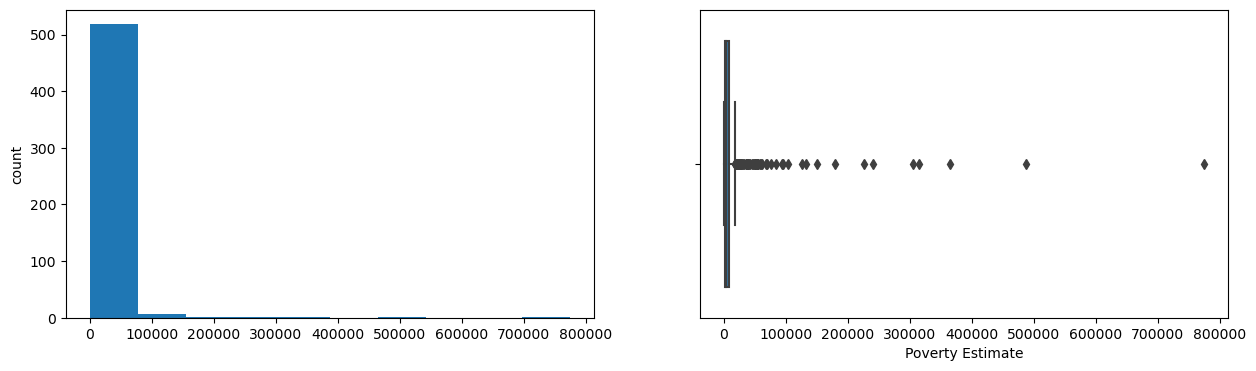

Poverty Percent
Skew : 0.53


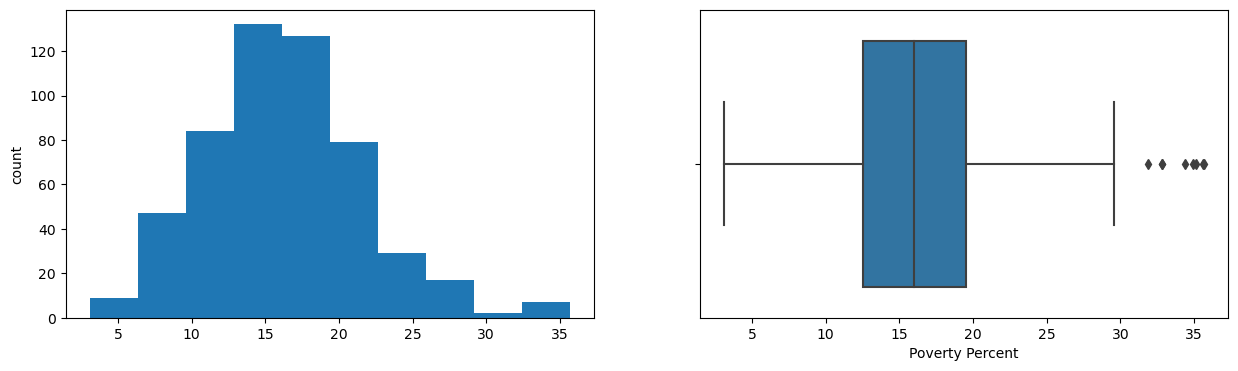

Median Household Income
Skew : 1.59


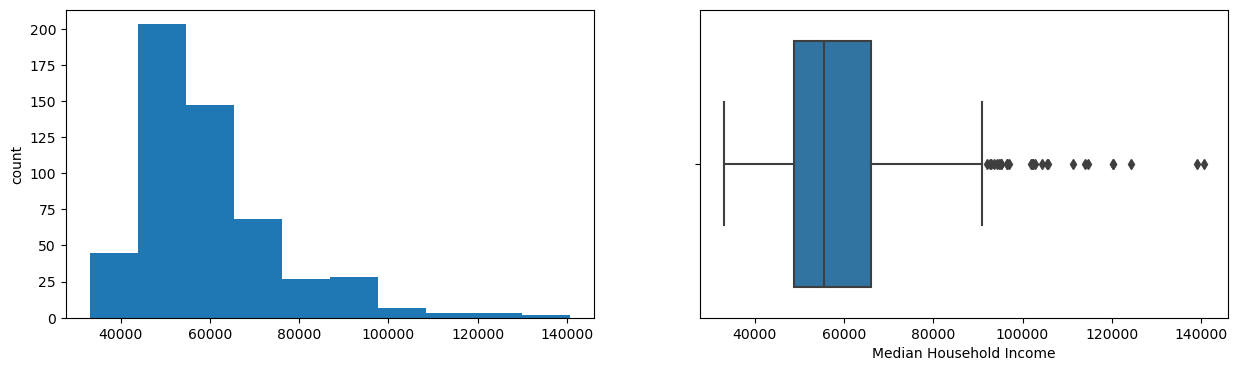

In [90]:
for col in num_cols:
    print(col)
    print('Skew :', round(pop_comb[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    pop_comb[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=pop_comb[col])
    plt.show()

<Figure size 1300x1700 with 0 Axes>

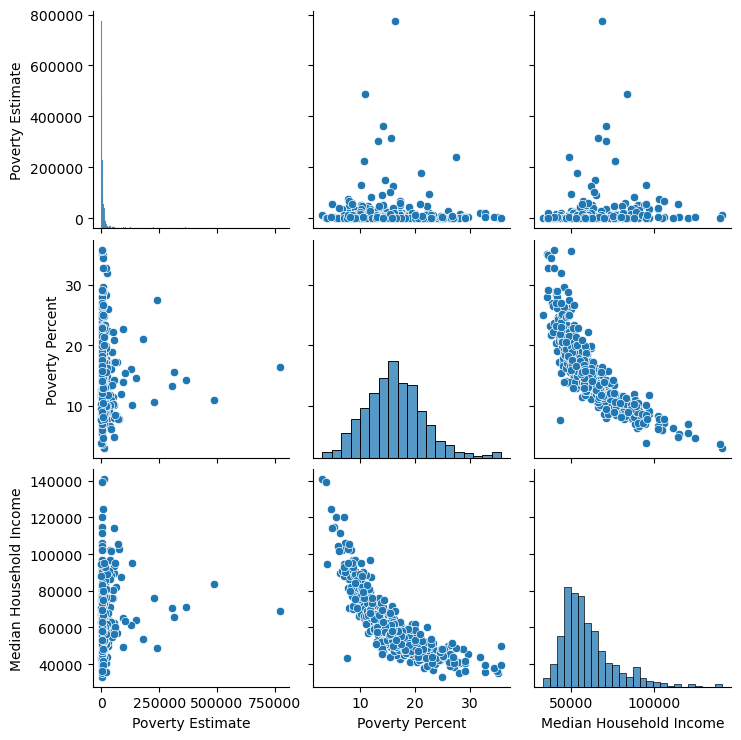

In [92]:
plt.figure(figsize=(13,17))
sns.pairplot(data=pop_comb[num_cols])
plt.show()

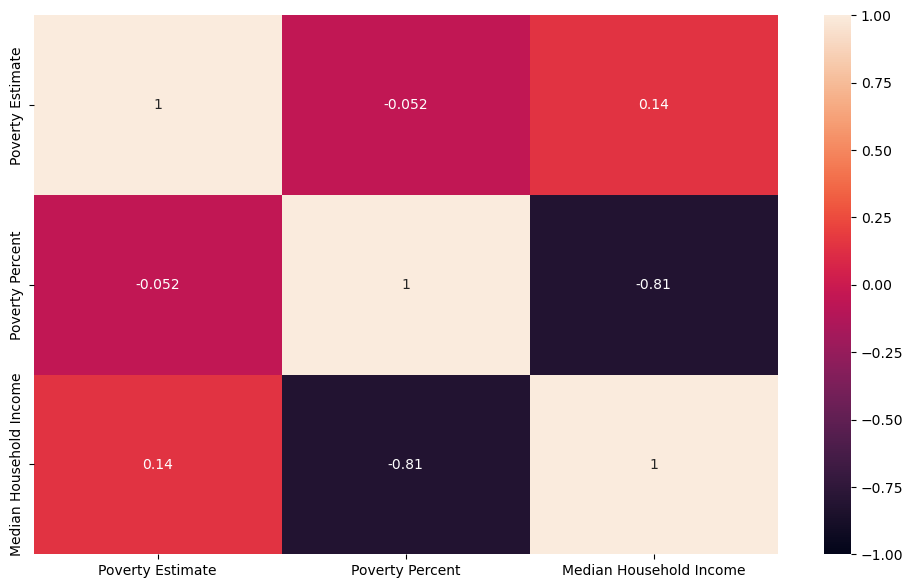

In [93]:
plt.figure(figsize=(12, 7))
sns.heatmap(pop_comb[num_cols].corr(), annot = True, vmin = -1, vmax = 1)
plt.show()